In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Load the dataset
columns = [
    'Family Name', 
    'Variation',
    'Algorithm Name', 
    'Year',
    'Looked at?',
    'Relevant?',
    'Parallel?',
    'Time Complexity Class',
    'Approximation Factor Class (Mult)', 
    'Approximation Factor Class (Add)',
    'Approximation Type (additive/multiplicative)',	
    'Parametrized Approximation?',
    'Type of PTAS (if PTAS)',
    'Quantum?',
    'Time Encoding',
    'Approx Error "Size" (for figures only)'
]
approximation_algorithms = pd.read_csv('approximation_algorithms.csv', usecols=columns)

# Clean and prepare the data
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0.001']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Looked at?'] != '0']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != 0]
approximation_algorithms = approximation_algorithms[approximation_algorithms['Relevant?'] != '0']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Parallel?'] != '1']

approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != '1']
approximation_algorithms = approximation_algorithms[approximation_algorithms['Quantum?'] != 1]






approximation_algorithms['Year'] = pd.to_numeric(approximation_algorithms['Year'].str.extract(r'(\d{4})')[0], errors='coerce')
approximation_algorithms.dropna(subset=['Year'], inplace=True)
# approximation_algorithms['Year'] = approximation_algorithms['Year'].astype(int)

# drop empty family names
approximation_algorithms = approximation_algorithms[approximation_algorithms['Family Name'].notnull()]

for col in ['Time Complexity Class', 'Approximation Factor Class (Mult)', 'Approximation Factor Class (Add)']:
    # Extract numeric (float) from string
    approximation_algorithms[col] = approximation_algorithms[col].astype(str).str.extract(r'(\d+\.?\d*)')[0].astype(float)
    approximation_algorithms[col] = approximation_algorithms[col].replace(0, 99999)
    

# drop nan time encoding
approximation_algorithms = approximation_algorithms[approximation_algorithms['Time Encoding'].notnull()]


# remove question marks from time encoding
approximation_algorithms['Time Encoding'] = approximation_algorithms['Time Encoding'].astype(str).str.replace('?', '')
approximation_algorithms['Time Encoding'].value_counts()



Time Encoding
10.0      80
20.0      46
400.0     32
11.0      26
21.0      19
16.0       9
15.0       9
16.24      8
500.0      8
25.0       8
15.015     8
25.02      6
30.0       6
40.0       5
15.41      3
16.1       3
26.5       2
31.0       2
6.0        2
12.0       2
12.1       2
600.0      2
16.5       1
1010.0     1
60.0       1
984.0      1
15.019     1
26.65      1
22.0       1
25.5       1
13.0       1
16.2       1
6.1        1
16.4       1
1045.0     1
6.6        1
15.26      1
15.25      1
25.51      1
25.2       1
26.55      1
21.5       1
25.3       1
27.0       1
15.097     1
41.0       1
Name: count, dtype: int64

In [3]:
# read sheet1
# Load the dataset
columns = [
    'Family Name',
    'Variation',
    'Algorithm Name',
    'Year',
    'Looked at?',
    'Time Complexity Class',
    'Approximate?',
    'Parallel?',
    'Quantum?',
    'Time Encoding',

]
sheet1 = pd.read_csv('sheet1.csv', usecols=columns)

# Clean and prepare the data
# drop Looked at? == 0.001
sheet1 = sheet1[sheet1['Looked at?'] != 0.001]
# drop Parallel? == 1
sheet1 = sheet1[sheet1['Parallel?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != '1']
sheet1 = sheet1[sheet1['Quantum?'] != 1]
# drop approximate? == 1
sheet1 = sheet1[sheet1['Approximate?'] != '1']
sheet1 = sheet1[sheet1['Approximate?'] != 1]


# parse time complexity class
sheet1['Time Complexity Class'] = sheet1['Time Complexity Class'].str.extract(
    r'(\d+\.?\d*)')[0].astype(float)


sheet1['Approx Error "Size" (for figures only)'] = '0'

# drop if Famiy Name is not in approximation_algorithms
# sheet1 = sheet1[sheet1['Family Name'].isin(
#     approximation_algorithms['Family Name'])]

# drop NaN time encoding
sheet1 = sheet1[sheet1['Time Encoding'].notnull()]

sheet1 = sheet1[sheet1['Time Encoding'] != '-']

sheet1['Time Encoding'].value_counts()


Time Encoding
20      141
10      118
11       72
30       47
16       23
       ... 
26.1      1
28.5      1
29.4      1
6         1
2021      1
Name: count, Length: 76, dtype: int64

In [4]:
# convert time encoding into a function name following this example: 10 -> comp_fn_10_0000 , 10.5 -> comp_fn_10_5000
def encode_time_to_function_name(time_str):
    # Split on the decimal point
    parts = time_str.split('.')
    integer_part = int(parts[0])
    decimal_part = 0
    if len(parts) > 1:
        decimal_fraction = parts[1] + "0000" 
        decimal_part = int(decimal_fraction[:4])  

    function_name = f"comp_fn_{integer_part:d}_{decimal_part:04d}"
    return function_name
print(sheet1['Time Encoding'].unique())
sheet1['Time Encoding Function'] = sheet1['Time Encoding'].apply(encode_time_to_function_name)
approximation_algorithms['Time Encoding Function'] = approximation_algorithms['Time Encoding'].apply(encode_time_to_function_name)


['10' '1000' '1515' '1045' '20' '11' '2000' '30' '942' '26.5' '16' '16.2'
 '15.5' '15.47' '15.26' '15.24' '15.23' '15.107' '15.103' '15.101' '21'
 '19' '16.27' '15.7' '988.1' '1010' '15.109' '12' '15.4' '10.1' '988.2'
 '16.1' '15.95' '16.9' '10.0005' '11.3' '40' '26.1' '29.2' '28.5' '29.4'
 '988' '986' '11.1' '6' '15.25' '15.097' '15.614' '15.41' '1' '9000'
 '1984' '960' '13.1' '11.585' '938' '938.1' '941.5' '1020' '9200' '41'
 '31' '22' '9305' '70' '51' '32' '944' '9122' '36.5' '13' '23' '52' '41.1'
 '940' '2021']


In [5]:
encode_time_to_function_name('6.6')

'comp_fn_6_6000'

In [6]:
import inspect
from complexity_functions import complexity_functions

elements = inspect.getmembers(complexity_functions, inspect.isfunction)
elements_dict = dict(elements)

# check if all time encoding functions are in the complexity_functions module
for time_encoding in sheet1['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(sheet1[sheet1['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


for time_encoding in approximation_algorithms['Time Encoding Function'].unique():
    if time_encoding not in elements_dict:
        # print algorithm name
        print(approximation_algorithms[approximation_algorithms['Time Encoding Function'] == time_encoding]['Time Complexity Class'].values[0])
        print(f"Function {time_encoding} not found in complexity_functions module")


In [7]:
sheet1['n = 10^3'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
sheet1['n = 10^6'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
sheet1['n = 10^9'] = sheet1['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))

approximation_algorithms['n = 10^3'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**3))
approximation_algorithms['n = 10^6'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**6))
approximation_algorithms['n = 10^9'] = approximation_algorithms['Time Encoding Function'].apply(lambda x: elements_dict[x](10**9))



In [8]:
# list families that are in both datasets
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

common_families = np.intersect1d(sheet1_families, approximation_families)
len(common_families)

# approximation_algorithms['Approx Error "Size" (for figures only)'].value_counts()


25

In [9]:
# all families sheet1 + approximation_algorithms
sheet1_families = sheet1['Family Name'].unique()
approximation_families = approximation_algorithms['Family Name'].unique()

all_families = sheet1_families.tolist() + approximation_families.tolist()
all_families = list(set(all_families))
all_families

['Longest Palindromic Substring',
 'Longest Path Problem',
 'Integer Factoring',
 'Line Simplification',
 'String Search',
 'Maximum Subarray Problem',
 'Block Ciphers',
 'SDD Systems Solvers',
 'Polygon Clipping',
 'Line Drawing',
 'Finding Frequent Itemsets',
 'Data Compression',
 'Matrix Product',
 'Topological Sorting',
 'Maximum-Weight Matching',
 'Nash Equilibria',
 'Linear System',
 'Root Computation',
 'Link Analysis',
 'Constructing Suffix Trees',
 'Interval Scheduling',
 'Maximum Cardinality Matching',
 'Joins',
 'Maximum Flow',
 'Closest Pair Problem',
 'Determinant of Matrices with Integer Entries',
 'Page Replacements',
 'The Set-Covering Problem',
 'Sequence Alignment',
 'Convex Hull',
 'Graph Edit Distance Computation',
 'kth Order Statistic',
 'Cryptanalysis of Linear Feedback Shift Registers',
 'Stable Matching Problem',
 'LU Decomposition',
 'Collaborative Filtering',
 'All-Pairs Shortest Paths (APSP)',
 'The Traveling-Salesman Problem',
 'Maximum Likelihood Methods i

In [10]:
# list families that are in approxmaiton_families but not in sheet1_families
missing_families = np.setdiff1d(approximation_families, sheet1_families)
missing_families

array(['Convex Optimization (Non-linear)', 'Root Computation',
       'Wiener Index'], dtype=object)

In [11]:
approximation_families

array(['Sorting', 'Matrix Chain Multiplication', 'Maximum Flow',
       'Matrix Product', 'Linear System', 'Minimum Spanning Tree (MST)',
       'Closest Pair Problem', 'All-Pairs Shortest Paths (APSP)',
       'LU Decomposition', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Convex Optimization (Non-linear)',
       'Optimal Binary Search Trees', 'Nash Equilibria',
       'Maximum-Weight Matching', 'Discrete Fourier Transform',
       'Eigenvalues (Iterative Methods)', 'Root Computation',
       'Nearest Neighbor Search', 'Cardinality Estimation',
       'The Traveling-Salesman Problem', 'The Subset-Sum Problem',
       'The Vertex Cover Problem', 'The Set-Covering Problem',
       'Link Analysis', 'Maximum Cut', 'Wiener Index',
       'Determinant of Matrices with Integer Entries'], dtype=object)

In [12]:
sheet1_families

array(['Optimal Binary Search Trees', 'The Subset-Sum Problem', 'Sorting',
       'kth Order Statistic', 'Matrix Chain Multiplication',
       'Longest Common Subsequence', 'Maximum Flow', 'Matrix Product',
       'Linear System', 'Line segment intersection', 'Convex Hull',
       'Minimum Spanning Tree (MST)', 'Closest Pair Problem',
       'LU Decomposition', 'String Search', 'Sequence Alignment',
       'Line Clipping', 'Multiplication', 'Line Simplification',
       'Nearest Neighbor Search', 'Maximum Subarray Problem',
       'Motif Search', 'The Traveling-Salesman Problem',
       'Strongly Connected Components', 'Shortest Path (Directed Graphs)',
       'All-Pairs Shortest Paths (APSP)', 'Integer Factoring',
       'Mutual Exclusion', 'Eigenvalues (Iterative Methods)',
       'Delaunay Triangulation', 'Joins', 'Maximum Cardinality Matching',
       'SDD Systems Solvers', 'Generating Random Permutations',
       'Minimum value in each row of an implicitly-defined totally monotone

In [13]:
def add_headers(
    fig,
    *,
    row_headers=None,
    col_headers=None,
    row_pad=1,
    col_pad=5,
    rotate_row_headers=True,
    **text_kwargs
):
    # Based on https://stackoverflow.com/a/25814386

    axes = fig.get_axes()

    for ax in axes:
        sbs = ax.get_subplotspec()

        # Putting headers on cols
        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                **text_kwargs,
            )

        # Putting headers on rows
        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                **text_kwargs,
            )

[['cgr_n_3_e_1', 'cgr_n_6_e_1', 'cgr_n_9_e_1'], ['cgr_n_3_e_2', 'cgr_n_6_e_2', 'cgr_n_9_e_2'], ['cgr_n_3_e_2_6', 'cgr_n_6_e_2_4', 'cgr_n_9_e_2_4'], ['cgr_n_3_e_4', 'cgr_n_6_e_4', 'cgr_n_9_e_4']]


/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_7112/528539924.py:132: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  ax.set_ylim(0.000, 3)
/var/folders/lx/jxx7wnmn4q5g51lkvkx6hndc0000gn/T/ipykernel_7112/528539924.py:163: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


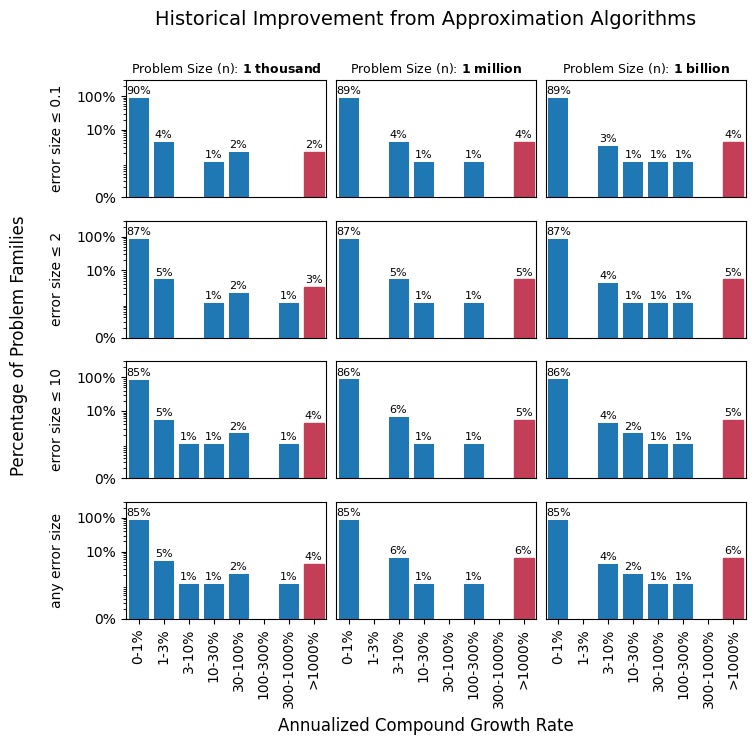

In [19]:
from complexity_functions.huge_num import Huge
CUR_YEAR = 2024
# 1 - "smaller" than 0.1
error_size_1 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'] == 1]
# 1 and 2
error_size_2 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2])]
# 1 and 2 and 2.4
error_size_2_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4])]
# 1 and 2 and 2.4 and 2.6
error_size_2_6 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6])]
# 1 and 2 and 3 and 4
error_size_4 = approximation_algorithms[approximation_algorithms['Approx Error "Size" (for figures only)'].isin([1, 2, 2.4, 2.6, 3, 4])]


def process_cgr_data(error_size_df, n):
    cgr = pd.DataFrame()
    cgr['Family Name'] = all_families
    cgr['b'] = cgr['Family Name'].apply(lambda x: sheet1[sheet1['Family Name'] == x][n].min())
    cgr['f'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x][n].min(), error_size_df[error_size_df['Family Name'] == x][n].min()))
    cgr['t'] = cgr['Family Name'].apply(lambda x: min(sheet1[sheet1['Family Name'] == x]['Year'].min(), error_size_df[error_size_df['Family Name'] == x]['Year'].min()))
    cgr['cgr'] = cgr.apply(lambda x: (x['f']/x['b'])**(1/(CUR_YEAR-x['t']))-1 if x['f'] >= x['b'] else (x['b']/x['f'])**(1/(CUR_YEAR-x['t']))-1, axis=1)
    # if 0 make it 0.0001
    cgr['cgr'] = cgr['cgr'].replace(0, 0.0001)
    cgr['cgr_percentage_group'] = pd.cut(cgr['cgr'], bins=[-1, 0.01, 0.03, 0.1, 0.3, 1, 3, 10, float("inf")], right=True, include_lowest=True, labels=['0-1%', '1-3%', '3-10%', '10-30%', '30-100%', '100-300%', '300-1000%','>1000%'])
    return cgr
                            
cgr_n_3_e_1 = process_cgr_data(error_size_1, 'n = 10^3')
cgr_n_6_e_1 = process_cgr_data(error_size_1, 'n = 10^6')
cgr_n_9_e_1 = process_cgr_data(error_size_1, 'n = 10^9')

cgr_n_3_e_2 = process_cgr_data(error_size_2, 'n = 10^3')
cgr_n_6_e_2 = process_cgr_data(error_size_2, 'n = 10^6')
cgr_n_9_e_2 = process_cgr_data(error_size_2, 'n = 10^9')

cgr_n_3_e_2_6 = process_cgr_data(error_size_2_6, 'n = 10^3')
cgr_n_6_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^6')
cgr_n_9_e_2_4 = process_cgr_data(error_size_2_4, 'n = 10^9')

cgr_n_3_e_4 = process_cgr_data(error_size_4, 'n = 10^3')
cgr_n_6_e_4 = process_cgr_data(error_size_4, 'n = 10^6')
cgr_n_9_e_4 = process_cgr_data(error_size_4, 'n = 10^9')


cgr_datasets = {
    'cgr_n_3_e_1': cgr_n_3_e_1,
    'cgr_n_6_e_1': cgr_n_6_e_1,
    'cgr_n_9_e_1': cgr_n_9_e_1,
    'cgr_n_3_e_2': cgr_n_3_e_2,
    'cgr_n_6_e_2': cgr_n_6_e_2,
    'cgr_n_9_e_2': cgr_n_9_e_2,
    'cgr_n_3_e_2_6': cgr_n_3_e_2_6,
    'cgr_n_6_e_2_4': cgr_n_6_e_2_4,
    'cgr_n_9_e_2_4': cgr_n_9_e_2_4,
    'cgr_n_3_e_4': cgr_n_3_e_4,
    'cgr_n_6_e_4': cgr_n_6_e_4,
    'cgr_n_9_e_4': cgr_n_9_e_4
}

# Create the mosaic plot
mosaic = [
    ["cgr_n_3_e_1", "cgr_n_6_e_1", "cgr_n_9_e_1"],
    ["cgr_n_3_e_2", "cgr_n_6_e_2", "cgr_n_9_e_2"],
    ["cgr_n_3_e_2_6", "cgr_n_6_e_2_4", "cgr_n_9_e_2_4"],
    ["cgr_n_3_e_4", "cgr_n_6_e_4", "cgr_n_9_e_4"]
]

row_headers = ["error size ≤ 0.1", "error size ≤ 2", "error size ≤ 10", "any error size"]
col_headers = ["Problem Size (n): "+r"$\bf{1\,\, thousand}$", "Problem Size (n): "+r"$\bf{1\,\, million}$", "Problem Size (n): "+r"$\bf{1\,\, billion}$"]
print(mosaic)
fig, axs = plt.subplot_mosaic(mosaic, figsize=(8, 7), sharex=True, sharey=True, gridspec_kw={"wspace": 0.05, "hspace": 0.2})

def add_headers(fig, *, row_headers=None, col_headers=None, row_pad=1, col_pad=5, rotate_row_headers=True, row_font_size="10", col_font_size="10", **text_kwargs):
    axes = fig.get_axes()
    for ax in axes:
        sbs = ax.get_subplotspec()

        if (col_headers is not None) and sbs.is_first_row():
            ax.annotate(
                col_headers[sbs.colspan.start],
                xy=(0.5, 1),
                xytext=(0, col_pad),
                xycoords="axes fraction",
                textcoords="offset points",
                ha="center",
                va="baseline",
                fontsize=col_font_size,
                **text_kwargs,
            )

        if (row_headers is not None) and sbs.is_first_col():
            ax.annotate(
                row_headers[sbs.rowspan.start],
                xy=(0, 0.5),
                xytext=(-ax.yaxis.labelpad - row_pad, 0),
                xycoords=ax.yaxis.label,
                textcoords="offset points",
                ha="right",
                va="center",
                rotation=rotate_row_headers * 90,
                fontsize=row_font_size,
                **text_kwargs,
            )

for key, ax in axs.items():
    error_size, n = key.split('_')[1], key.split('_')[3]
    cgr_data = cgr_datasets[key]
    cgr_data['cgr_percentage_group'].value_counts(normalize=True).sort_index().plot(kind='bar', ax=ax)

add_headers(fig, col_headers=col_headers, row_headers=row_headers, fontweight="regular", col_font_size="9")

for ax in axs.values():
    for patch in ax.patches:
        current_width = patch.get_width()
        new_width = current_width + 0.3  # Increase the width by 0.3 (adjust as needed)
        patch.set_width(new_width)
        
        # Adjust the x-position to center the bar
        patch.set_x(patch.get_x() - (new_width - current_width) / 2)



nrows = 4  # Example: number of rows in your subplot grid
ncols = 3  # Example: number of columns in your subplot grid

for i, (key, ax) in enumerate(axs.items()):

    # ax add padding top
    ax.margins(y=0.5)

    ax.set(ylabel='', xlabel='')
    ax.set_yscale('log')
    ax.set_ylim(0.000, 3)
    ax.set_yticks([0.001, 0.1, 1])
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0%}'))
    ax.tick_params(axis='x', rotation=90)
    
    # Calculate row and column index
    row_index = i // ncols
    col_index = i % ncols

    # Hide x-axis if it's not the last row
    if row_index != nrows - 1:
        ax.xaxis.set_visible(False)
    
    # Hide y-axis if it's not the first column
    if col_index != 0:
        ax.yaxis.set_visible(False)

axs_list = list(axs.values())
for index, ax in enumerate(axs_list):

    ax.patches[-1].set_color('#C33E56')


for ax in axs.values():
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.0%}', (p.get_x()+.0 + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points', fontsize=8)

fig.suptitle("Historical Improvement from Approximation Algorithms", fontsize=14)
fig.text(0.5, -0.05, 'Annualized Compound Growth Rate', ha='center', fontsize=12)
fig.text(-0.02, 0.5, 'Percentage of Problem Families', va='center', rotation='vertical', fontsize=12)

plt.tight_layout()

plt.savefig('figures/time-including-no-approximation-families.png', bbox_inches='tight')
plt.savefig('figures/figure 4.png', bbox_inches='tight')

plt.show()

# New Graph

